# Trend Analysis & Visualization

**Data**: 2020-2023 (4 years)
**Requires**: matplotlib

Analyze device adverse events over time with visualizations.

In [1]:
import sys
from pathlib import Path
sys.path.insert(0, str(Path().resolve().parent / 'src'))

from maude_db import MaudeDatabase
import pandas as pd
import matplotlib.pyplot as plt

print('✓ Setup complete!')

✓ Setup complete!


In [2]:
db = MaudeDatabase('trends.db', verbose=True)

db.add_years(
    years='2020-2023',
    tables=['device', 'master'],
    download=True,
    data_dir='./maude_data'
)

print('\n✓ Data loaded!')


Grouping years by file for optimization...

  Using cached device2020.zip
  Using cached device2021.zip
  Using cached device2022.zip
  Using cached device2023.zip
  Using mdrfoithru2024.zip instead (latest available cumulative file).
  Using cached mdrfoithru2024.zip

Processing data files...

device for year 2020 already loaded and unchanged, skipping

device for year 2021 already loaded and unchanged, skipping

device for year 2022 already loaded and unchanged, skipping

device for year 2023 already loaded and unchanged, skipping

master for years 2020-2023 already loaded and unchanged, skipping

Creating indexes...

Database update complete

✓ Data loaded!


In [3]:
# Get trends for thrombectomy devices
trends = db.get_trends_by_year(device_name='thrombectomy')
print(trends)

   year  event_count  deaths  injuries  malfunctions
0  2020           45       3        32            10
1  2021          221      11        78           132
2  2022          287      13        49           225
3  2023          387      17       108           261


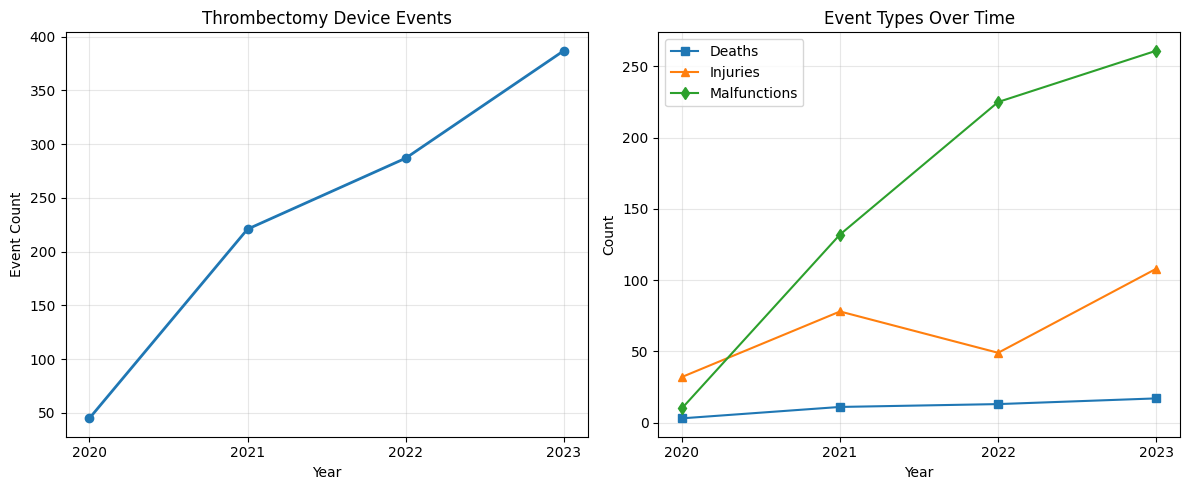

In [4]:
# Plot trends
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(trends['year'], trends['event_count'], marker='o', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Event Count')
plt.title('Thrombectomy Device Events')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(trends['year'], trends['deaths'], marker='s', label='Deaths')
plt.plot(trends['year'], trends['injuries'], marker='^', label='Injuries')
plt.plot(trends['year'], trends['malfunctions'], marker='d', label='Malfunctions')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Event Types Over Time')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('thrombectomy_trends.png', dpi=150)
plt.show()

In [5]:
db.close()
print('✓ See notebook 04 for SQL queries!')

✓ See notebook 04 for SQL queries!
